<a href="https://colab.research.google.com/github/sayantanmukh050893/campusX-practice/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Conv2D,AveragePooling2D,Flatten
from keras.models import Sequential
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import numpy as np
X_train = np.pad(X_train, ((0,0),(2,2),(2,2)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2)), 'constant')

X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(6,kernel_size=(5,5),padding="valid",activation="tanh",input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Conv2D(16,kernel_size=(5,5),padding="valid",activation="tanh"))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Flatten())
model.add(Dense(120,activation="tanh"))
model.add(Dense(84,activation="tanh"))
model.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
X_train_new,y_train_new = X_train[0:45000]/255.0,y_train[0:45000]
X_validation,y_validation = X_train[45000:]/255.0,y_train[45000:]
X_test = X_test/255.0

In [ ]:
model.fit(X_train_new, y_train_new, epochs=10, validation_data=(X_validation, y_validation))

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8658 - loss: 0.4628 - val_accuracy: 0.9586 - val_loss: 0.1361
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9661 - loss: 0.1129 - val_accuracy: 0.9681 - val_loss: 0.1059
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9779 - loss: 0.0707 - val_accuracy: 0.9741 - val_loss: 0.0858
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9840 - loss: 0.0518 - val_accuracy: 0.9786 - val_loss: 0.0709
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9881 - loss: 0.0370 - val_accuracy: 0.9809 - val_loss: 0.0614
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9904 - loss: 0.0306 - val_accuracy: 0.9793 - val_loss: 0.0696
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9924 - loss: 0.0235 - val_accuracy: 0.9811 - val_loss: 0.0652
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0212

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9801 - loss: 0.0686


[0.05765971541404724, 0.9833999872207642]

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[7 2 1 ... 4 5 6]


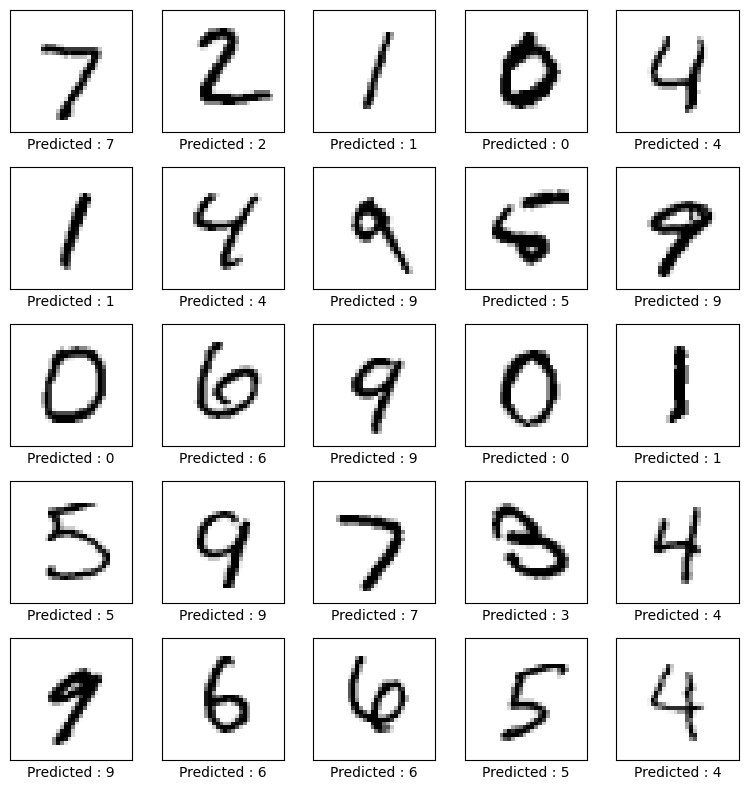

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Predicted : {y_pred[i]}")
    plt.tight_layout()

plt.show()